#BUSINESS OBJECTIVE:

######Poor inventory management leads to a loss in sales which in turn paints an inaccurate picture of lower demand for certain items, making future order predictions based on that past data inherently inaccurate. Instead, smart retailers use real-time data to move inventory where it’s needed before it’s too late. Additionally, they use predictive analytics to decide what to stock and where based on data about regional differences in preferences, weather, etc.

####INSTALLING **PYFOREST** LIB FOR ALL DATA ANALYTICS LIBS CALLED IMPLICITLY

In [3]:
!pip install pyforest
import pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=bd52b21f08725feab422e1ff4be1f50435d31e6951719a8fdff741da0480cd94
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Inventory_P47/prorevenue.rar", outdir="/content")

     |████████████████████████████████| 81kB 2.7MB/s 
patool: Extracting /content/drive/MyDrive/Inventory_P47/prorevenue.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Inventory_P47/prorevenue.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/Inventory_P47/prorevenue.rar extracted to `/content'.


'/content'

#### CUSTOM BUILT **AUTO EDA** CLASS DEF

In [16]:
from tqdm import tqdm 
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm 
import warnings
warnings.filterwarnings("ignore")
class Complete_eda:
  def __init__(obj, dataset, target):  ##Constructor
    obj.dataset=dataset
    obj.target=target
  def analyze(obj):####Method of class
    print("\ncomplete information:")
    print(obj.dataset.info())
    #Total Records
    print("\n\nNo of Records:",obj.dataset.shape[0])
    #Total Columns
    print("\n\nNo of Columns:",obj.dataset.shape[1],end="\n")
    #Column names
    i,j=0,0
    #loop1
    for i,j in tqdm(enumerate(obj.dataset.columns)):
      print(i,j, sep="\t",end="\n")
    #Duplicates
    print("\n\nNo of Duplicates:",obj.dataset[obj.dataset.duplicated()].shape[0])
    dup=obj.dataset[obj.dataset.duplicated()].shape[0]/obj.dataset.shape[0]*100
    print("\n\n%of duplicate entries:",round(dup,3))
    #Target Variable
    i,j=0,0
    print("\n\nTarget Variable:",obj.dataset[str(obj.target)].name)   
    #loop 2
    for i,j in tqdm(enumerate(obj.dataset[str(obj.target)].value_counts())):
      print(i,j,sep="\t",end="\n")
    #Null Entries
    i,j,e=0,0,0
    print("\n\nNull Entries/Missing Values:")
    #loop 3
    for i,j in tqdm(enumerate(obj.dataset.isnull().sum())):
      if(j>0):
        print(obj.dataset.iloc[:,i].name,j,sep="\t",end="\n")
        e=e+j
        print("Null Percentage:",round(j/obj.dataset.shape[0],3)*100)
    print("Total Null Entries:",e)
    plt.figure(figsize=(15,5))
    plt.title("Missing Values")
    cols =obj.dataset.columns 
    colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
    sns.heatmap(obj.dataset[cols].isnull(),cmap=sns.color_palette(colours))
    plt.figure(figsize=(10,5))
    plt.title("Numerical data Correlation")
    sns.heatmap(obj.dataset.corr(), annot=True, cmap= 'viridis')
####Univariate analysis##########
    i=0
    #loop 4
    for i in tqdm(range(len(obj.dataset.columns))):
      if obj.dataset.iloc[:,i].dtype=='object':
        print("\n\nCategorical Columns:")  ####Object dtype
        print("\n",obj.dataset.iloc[:,i].name)
        print(obj.dataset.iloc[:,i].value_counts(),end="\n")
        print(obj.dataset.iloc[:,i].unique(),end="\n")
        if len(obj.dataset.iloc[:,i].unique()) < 60:
          plt.figure(figsize=(20,5)) ##Object Data type having less than 60 categ
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.xlabel(str(obj.dataset.iloc[:,i].name))
          plt.ylabel("Value_Counts")
          plt.subplot(1,2,1)
          obj.dataset.iloc[:,i].value_counts().plot.bar()
          plt.subplot(1,2,2)
          sns.countplot(str(obj.dataset.iloc[:,i].name), hue=obj.target,data=obj.dataset.drop_duplicates()) ##1
        else: 
          print("\n",obj.dataset.iloc[:,i].name)###Object dtype for more than 60 categories
          plt.figure(figsize=(20,5))
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.xlabel(str(obj.dataset.iloc[:,i].name))
          plt.ylabel("Value_Counts")
          obj.dataset.iloc[:,i].value_counts().plot.hist(bins=10)
          print("Total Unique Categories:",obj.dataset.iloc[:,i].unique().shape[0])
          print("\n",obj.dataset.iloc[:,i].name)
          #loop 5
          for x,y in tqdm(enumerate(obj.dataset.iloc[:,i].value_counts())):
            print(x,y,sep="\t",end="\n")
###########done categorical values #################
      else:
        print("\n\nNumerical Column")
        if(obj.dataset.iloc[:,i].name!=obj.target):
          print("\n",obj.dataset.iloc[:,i].name)
          print(obj.dataset.iloc[:,i].describe().astype("int64"))
          l=0
          l=obj.dataset.iloc[:,i].unique().shape[0]/obj.dataset.shape[0]*100
          print("\n\n% of unique entries:",round(l,4))
          plt.figure(figsize=(20,5))
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.subplot(1,2,1)
          plt.title(str(obj.dataset.iloc[:,i].name))
          obj.dataset.iloc[:,i].plot.hist()
          plt.figure(figsize=(15,5))
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.subplot(1,2,2)
          plt.title(str(obj.dataset.iloc[:,i].name))
          sns.boxplot(x=obj.target, y=obj.dataset.iloc[:,i].name, data=obj.dataset)
          



###LOADING DATASETS

In [14]:
#old_url=https://docs.google.com/spreadsheets/d/1r3IfJZt0olzwGVbqZK8jf0dTnHCBjfcgJHOkK_IrJaA/edit#gid=1998402279
#google_url=r"https://docs.google.com/spreadsheets/d/1r3IfJZt0olzwGVbqZK8jf0dTnHCBjfcgJHOkK_IrJaA/export?format=csv&gid=1998402279"
#data_product=pd.read_csv("google_url") 
data_product=pd.read_csv(r"/productdetails.csv")
data1=pd.read_csv(r"./prorevenue.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.



###PROREVENUE.CSV DATASET EDA ANALYSIS

In [15]:
data1.columns

Index(['Product type', 'Revenue', 'No of purchases', 'store status',
       'Promotion applied', 'Generic Holiday', 'Education Holiday',
       'DayOfWeek'],
      dtype='object')

8it [00:00, 843.29it/s]


complete information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Product type       1017209 non-null  int64 
 1   Revenue            1017209 non-null  int64 
 2   No of purchases    1017209 non-null  int64 
 3   store status       1017209 non-null  object
 4   Promotion applied  1017209 non-null  int64 
 5   Generic Holiday    1017209 non-null  object
 6   Education Holiday  1017209 non-null  int64 
 7   DayOfWeek          1017209 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 62.1+ MB
None


No of Records: 1017209


No of Columns: 8
0	Product type
1	Revenue
2	No of purchases
3	store status
4	Promotion applied
5	Generic Holiday
6	Education Holiday
7	DayOfWeek




No of Duplicates: 152740


7it [00:00, 7047.56it/s]
8it [00:00, 20020.54it/s]



%of duplicate entries: 15.016


Target Variable: DayOfWeek
0	145845
1	145845
2	145665
3	145664
4	144730
5	144730
6	144730


Null Entries/Missing Values:
Total Null Entries: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/8 [00:00<?, ?it/s]



Numerical Column

 Product type
count    1017209
mean         558
std          321
min            1
25%          280
50%          558
75%          838
max         1115
Name: Product type, dtype: int64


% of unique entries: 0.1096


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 12%|█▎        | 1/8 [00:00<00:03,  1.77it/s]



Numerical Column

 Revenue
count    1017209
mean        5773
std         3849
min            0
25%         3727
50%         5744
75%         7856
max        41551
Name: Revenue, dtype: int64


% of unique entries: 2.1366


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 25%|██▌       | 2/8 [00:01<00:03,  1.70it/s]



Numerical Column

 No of purchases
count    1017209
mean         633
std          464
min            0
25%          405
50%          609
75%          837
max         7388
Name: No of purchases, dtype: int64


% of unique entries: 0.4017


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 38%|███▊      | 3/8 [00:01<00:02,  1.68it/s]



Categorical Columns:

 store status
open     844390
close    172819
Name: store status, dtype: int64
['open' 'close']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 50%|█████     | 4/8 [00:03<00:03,  1.11it/s]



Numerical Column

 Promotion applied
count    1017209
mean           0
std            0
min            0
25%            0
50%            0
75%            1
max            1
Name: Promotion applied, dtype: int64


% of unique entries: 0.0002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 62%|██████▎   | 5/8 [00:03<00:02,  1.32it/s]



Categorical Columns:

 Generic Holiday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: Generic Holiday, dtype: int64
['0' 'a' 'b' 'c' 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 75%|███████▌  | 6/8 [00:05<00:01,  1.06it/s]



Numerical Column

 Education Holiday
count    1017209
mean           0
std            0
min            0
25%            0
50%            0
75%            0
max            1
Name: Education Holiday, dtype: int64


% of unique entries: 0.0002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 8/8 [00:05<00:00,  1.39it/s]




Numerical Column


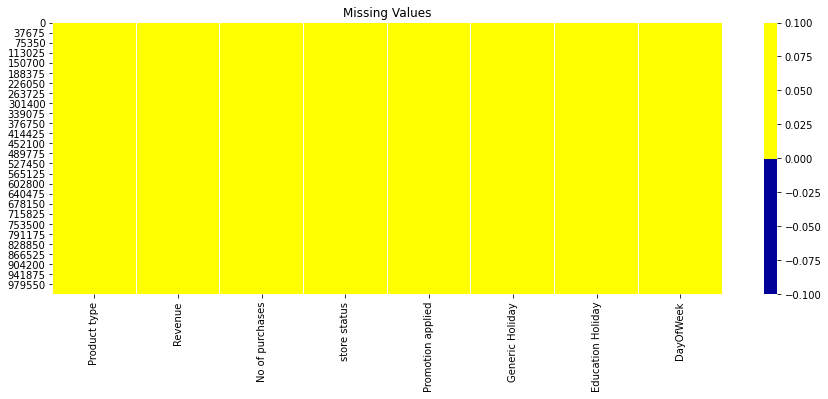

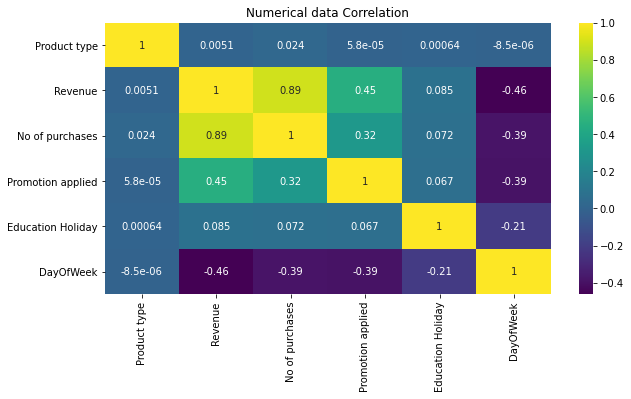

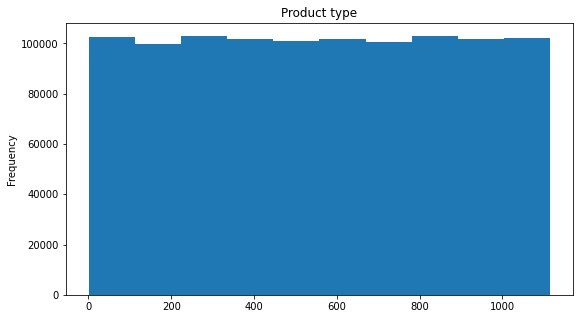

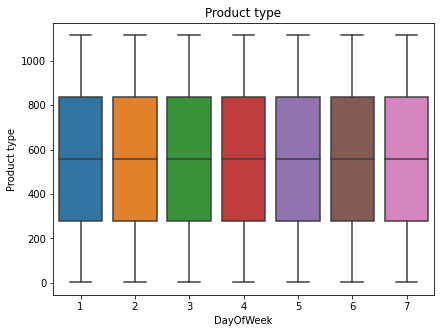

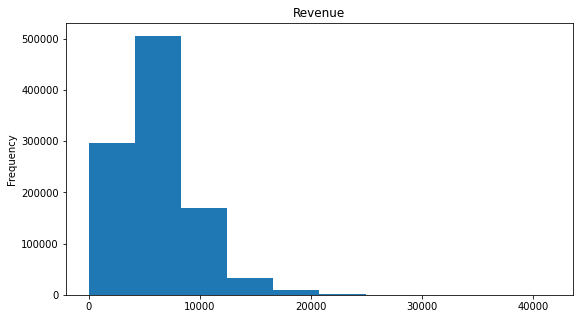

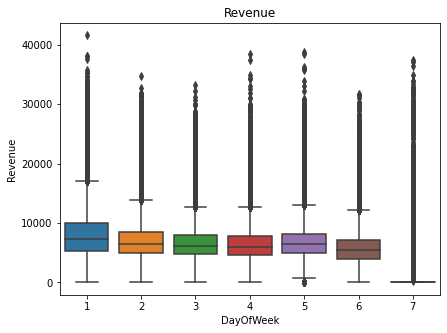

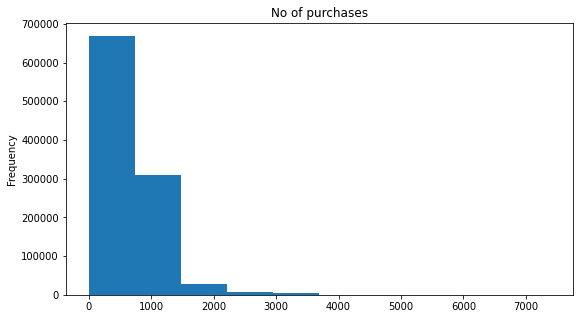

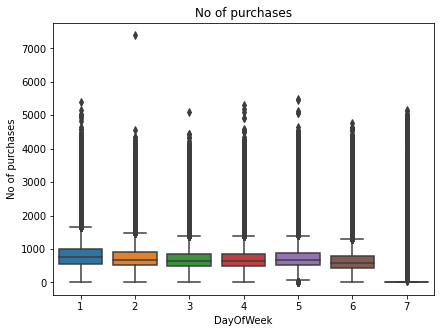

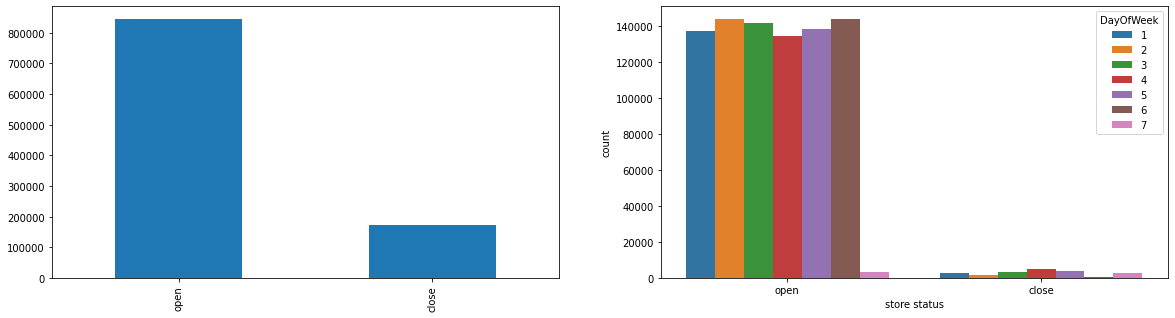

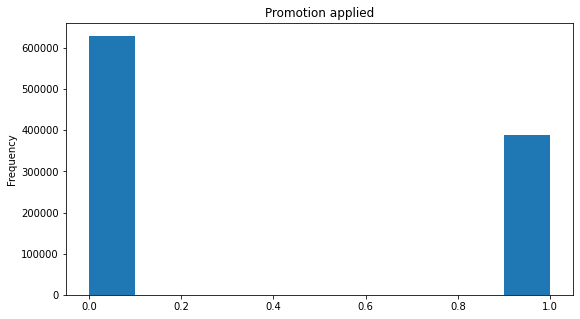

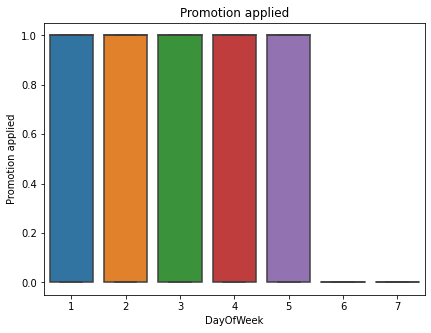

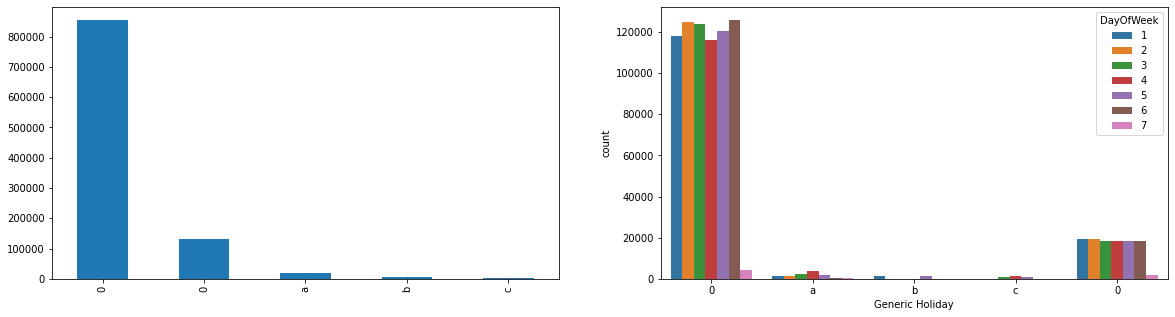

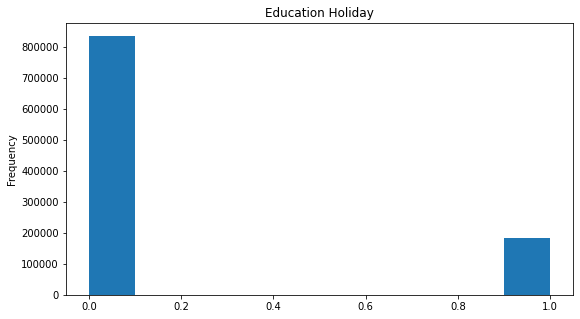

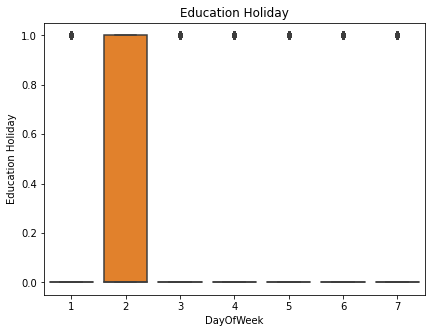

In [19]:
try:
  obj1 =Complete_eda(data1,"DayOfWeek")
  obj1.analyze()
except  NameError:
    print("Please load proper dataset in pandas dataframe or check dataset name")
except KeyError:
     print("Please type correct target variable") 

###PRODUCTDETAILS.CSV EDA ANALYSIS

In [20]:
data_product.drop(["Unnamed: 0"],axis=1,inplace=True)
data_product.columns

Index(['product type', 'cost per unit', 'Time for delivery'], dtype='object')

In [21]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product type       1115 non-null   int64
 1   cost per unit      1115 non-null   int64
 2   Time for delivery  1115 non-null   int64
dtypes: int64(3)
memory usage: 26.3 KB


3it [00:00, 9191.32it/s]
10it [00:00, 912.50it/s]
3it [00:00, 744.51it/s]


complete information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product type       1115 non-null   int64
 1   cost per unit      1115 non-null   int64
 2   Time for delivery  1115 non-null   int64
dtypes: int64(3)
memory usage: 26.3 KB
None


No of Records: 1115


No of Columns: 3
0	product type
1	cost per unit
2	Time for delivery


No of Duplicates: 0


%of duplicate entries: 0.0


Target Variable: Time for delivery
0	125
1	119
2	119
3	116
4	115
5	110
6	109
7	109
8	100
9	93


Null Entries/Missing Values:
Total Null Entries: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/3 [00:00<?, ?it/s]



Numerical Column

 product type
count    1115
mean      558
std       322
min         1
25%       279
50%       558
75%       836
max      1115
Name: product type, dtype: int64


% of unique entries: 100.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 33%|███▎      | 1/3 [00:00<00:00,  3.93it/s]



Numerical Column

 cost per unit
count    1115
mean     1012
std       565
min        50
25%       502
50%      1024
75%      1517
max      1999
Name: cost per unit, dtype: int64


% of unique entries: 77.3991


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 3/3 [00:00<00:00,  4.34it/s]




Numerical Column


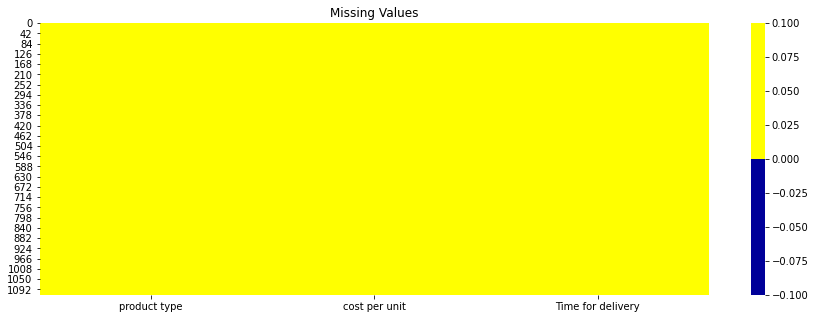

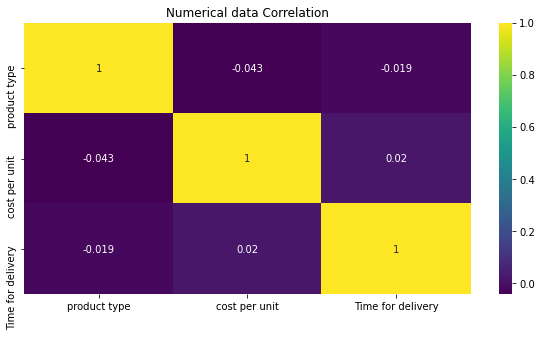

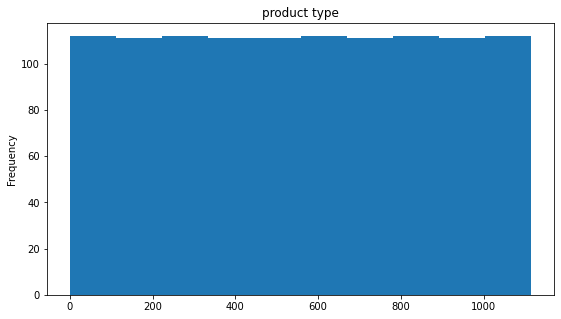

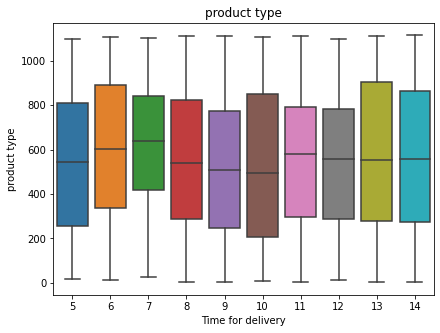

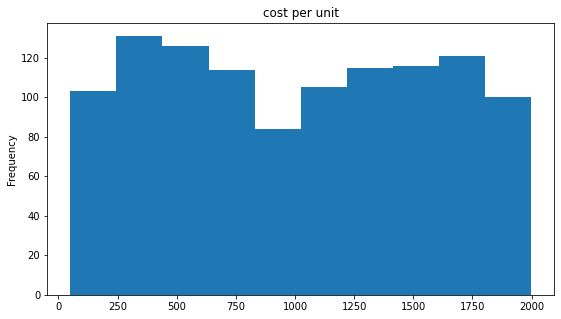

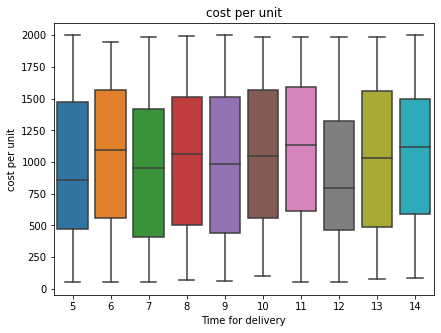

In [22]:
obj1 =Complete_eda(data_product,"Time for delivery")
obj1.analyze()


###GENERIC HOLIDAY COLUMN FEATURE ENGINEERING OF PROREVENUE DATASET

In [23]:
data2=data1.copy()
data2.columns

Index(['Product type', 'Revenue', 'No of purchases', 'store status',
       'Promotion applied', 'Generic Holiday', 'Education Holiday',
       'DayOfWeek'],
      dtype='object')

In [24]:
data2["Generic Holiday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [25]:
data2["Generic Holiday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: Generic Holiday, dtype: int64

In [26]:
data2["Generic Holiday"]=data1["Generic Holiday"].map({'0':0,0:0,"a":1,"b":1,"c":1})

In [27]:
data2["Generic Holiday"].value_counts()

0    986159
1     31050
Name: Generic Holiday, dtype: int64

In [28]:
data2.isnull().sum()

Product type         0
Revenue              0
No of purchases      0
store status         0
Promotion applied    0
Generic Holiday      0
Education Holiday    0
DayOfWeek            0
dtype: int64

###MERGING BOTH DATASETS INTO ONE 

In [29]:
data_product.columns

Index(['product type', 'cost per unit', 'Time for delivery'], dtype='object')

In [30]:
data3=data2.copy()

In [31]:
data3.rename(str.lower, axis='columns',inplace=True)

In [32]:
data3.columns

Index(['product type', 'revenue', 'no of purchases', 'store status',
       'promotion applied', 'generic holiday', 'education holiday',
       'dayofweek'],
      dtype='object')

In [33]:
data3.head()

,product type,revenue,no of purchases,store status,promotion applied,generic holiday,education holiday,dayofweek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [34]:
data_all=pd.merge(data3,data_product, on="product type")

<IPython.core.display.Javascript object>

In [35]:
pd.set_option('display.max_columns', None)
data_all.head()

<IPython.core.display.Javascript object>

,product type,revenue,no of purchases,store status,promotion applied,generic holiday,education holiday,dayofweek,cost per unit,Time for delivery
0,1,14190,890,open,1,0,1,5,457,11
1,1,5020,546,open,1,0,1,4,457,11
2,1,4782,523,open,1,0,1,3,457,11
3,1,5011,560,open,1,0,1,2,457,11
4,1,6102,612,open,1,0,1,1,457,11


In [38]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   product type       1017209 non-null  int64 
 1   revenue            1017209 non-null  int64 
 2   no of purchases    1017209 non-null  int64 
 3   store status       1017209 non-null  object
 4   promotion applied  1017209 non-null  int64 
 5   generic holiday    1017209 non-null  int64 
 6   education holiday  1017209 non-null  int64 
 7   dayofweek          1017209 non-null  int64 
 8   cost per unit      1017209 non-null  int64 
 9   Time for delivery  1017209 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 85.4+ MB


In [41]:
#to save new data in csv file 
data_all.to_csv(r"/content/drive/MyDrive/Inventory_P47/prorevenue_all.csv",index=False)

###EDA ANALYSIS OF NEW DATASET 

10it [00:00, 9112.11it/s]


complete information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   product type       1017209 non-null  int64 
 1   revenue            1017209 non-null  int64 
 2   no of purchases    1017209 non-null  int64 
 3   store status       1017209 non-null  object
 4   promotion applied  1017209 non-null  int64 
 5   generic holiday    1017209 non-null  int64 
 6   education holiday  1017209 non-null  int64 
 7   dayofweek          1017209 non-null  int64 
 8   cost per unit      1017209 non-null  int64 
 9   Time for delivery  1017209 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 85.4+ MB
None


No of Records: 1017209


No of Columns: 10
0	product type
1	revenue
2	no of purchases
3	store status
4	promotion applied
5	generic holiday
6	education holiday
7	dayofweek
8	cost per unit
9	Time for delivery




No of Duplicates: 156958


7it [00:00, 1035.48it/s]
10it [00:00, 6465.71it/s]



%of duplicate entries: 15.43


Target Variable: dayofweek
0	145845
1	145845
2	145665
3	145664
4	144730
5	144730
6	144730


Null Entries/Missing Values:
Total Null Entries: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/10 [00:00<?, ?it/s]



Numerical Column

 product type
count    1017209
mean         558
std          321
min            1
25%          280
50%          558
75%          838
max         1115
Name: product type, dtype: int64


% of unique entries: 0.1096


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 10%|█         | 1/10 [00:00<00:03,  2.43it/s]



Numerical Column

 revenue
count    1017209
mean        5773
std         3849
min            0
25%         3727
50%         5744
75%         7856
max        41551
Name: revenue, dtype: int64


% of unique entries: 2.1366


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 20%|██        | 2/10 [00:00<00:03,  2.31it/s]



Numerical Column

 no of purchases
count    1017209
mean         633
std          464
min            0
25%          405
50%          609
75%          837
max         7388
Name: no of purchases, dtype: int64


% of unique entries: 0.4017


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 30%|███       | 3/10 [00:01<00:03,  2.23it/s]



Categorical Columns:

 store status
open     844390
close    172819
Name: store status, dtype: int64
['open' 'close']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 40%|████      | 4/10 [00:02<00:04,  1.43it/s]



Numerical Column

 promotion applied
count    1017209
mean           0
std            0
min            0
25%            0
50%            0
75%            1
max            1
Name: promotion applied, dtype: int64


% of unique entries: 0.0002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 50%|█████     | 5/10 [00:03<00:03,  1.62it/s]



Numerical Column

 generic holiday
count    1017209
mean           0
std            0
min            0
25%            0
50%            0
75%            0
max            1
Name: generic holiday, dtype: int64


% of unique entries: 0.0002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 60%|██████    | 6/10 [00:03<00:02,  1.61it/s]



Numerical Column

 education holiday
count    1017209
mean           0
std            0
min            0
25%            0
50%            0
75%            0
max            1
Name: education holiday, dtype: int64


% of unique entries: 0.0002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 70%|███████   | 7/10 [00:04<00:01,  1.77it/s]



Numerical Column


Numerical Column

 cost per unit
count    1017209
mean        1012
std          565
min           50
25%          502
50%         1023
75%         1519
max         1999
Name: cost per unit, dtype: int64


% of unique entries: 0.0848


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 90%|█████████ | 9/10 [00:04<00:00,  2.19it/s]



Numerical Column

 Time for delivery
count    1017209
mean           9
std            2
min            5
25%            7
50%           10
75%           12
max           14
Name: Time for delivery, dtype: int64


% of unique entries: 0.001


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


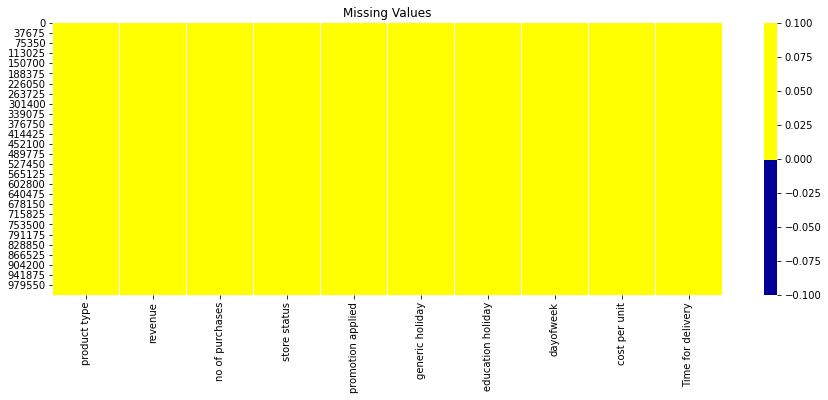

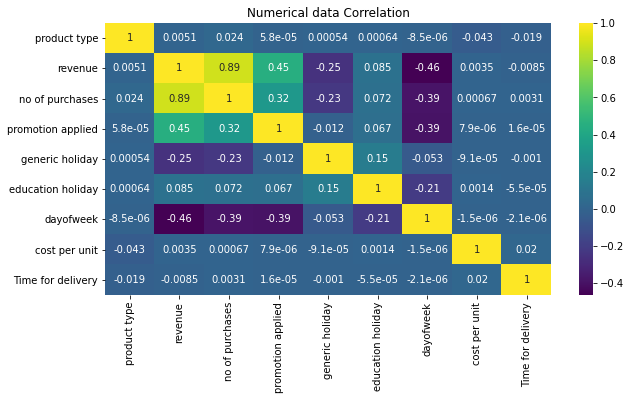

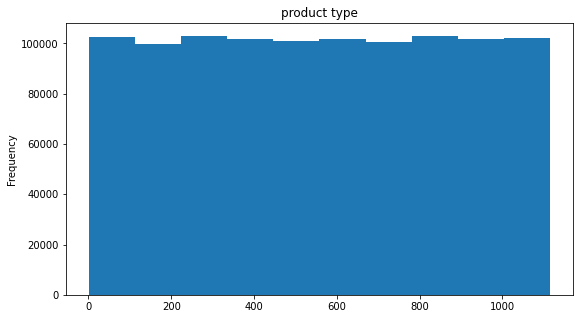

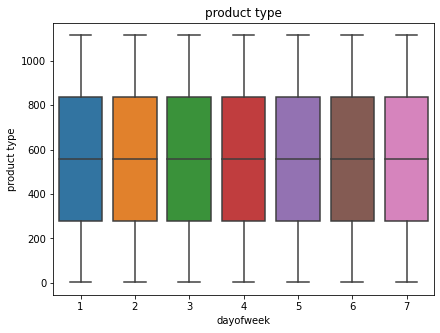

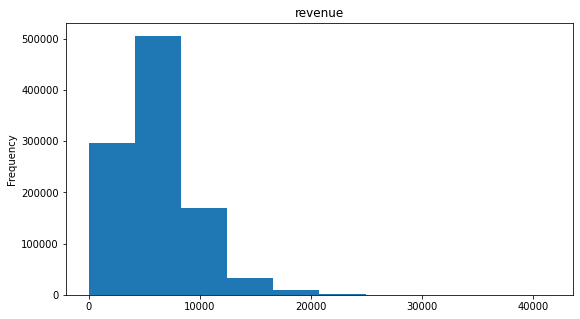

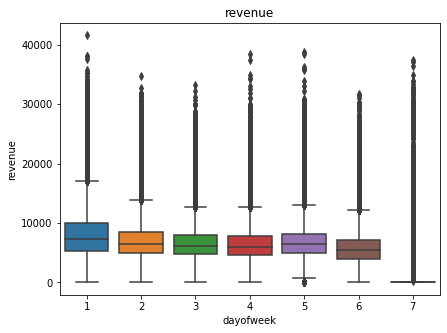

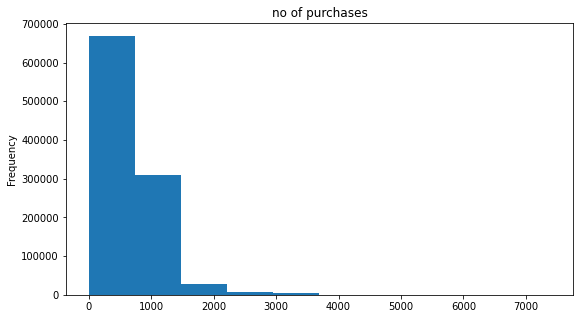

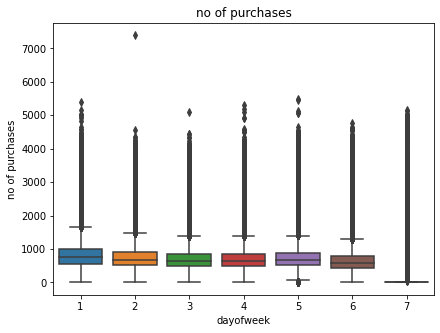

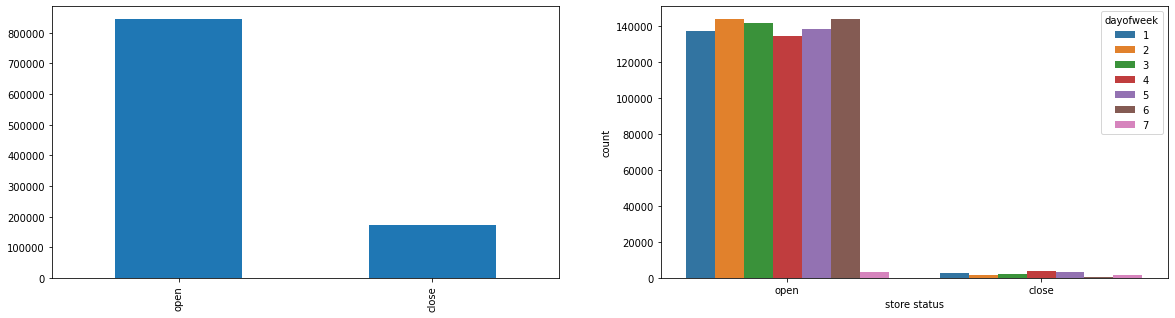

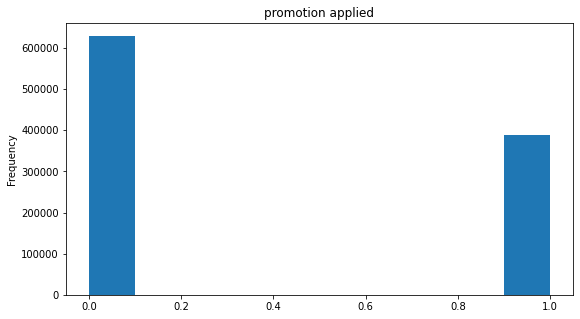

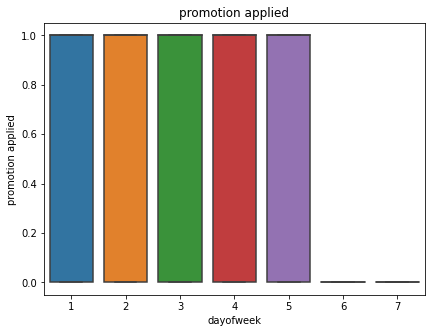

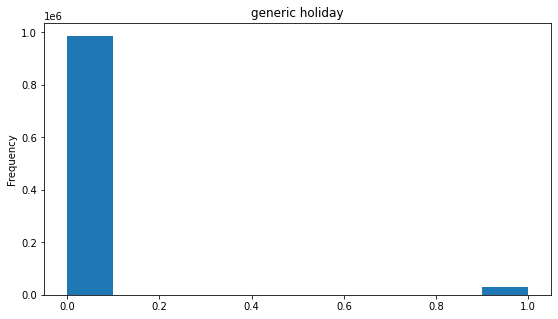

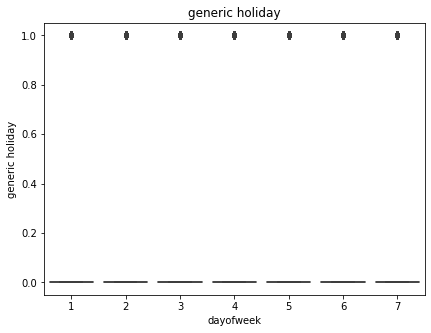

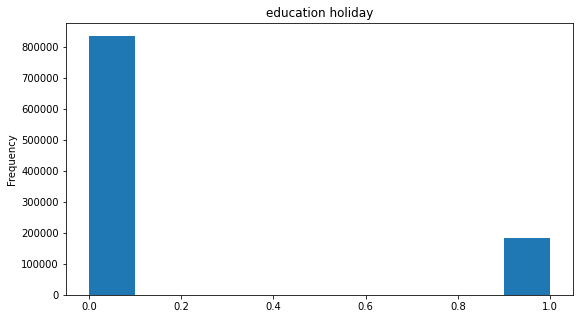

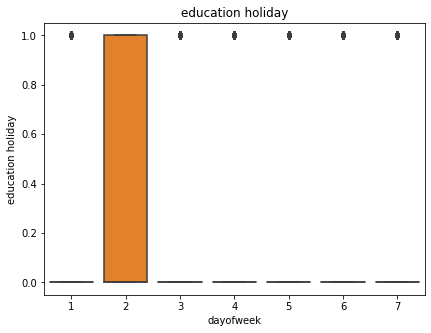

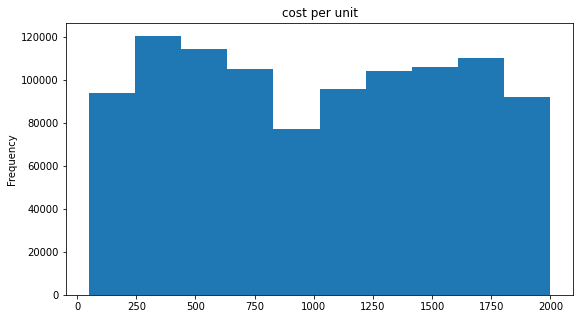

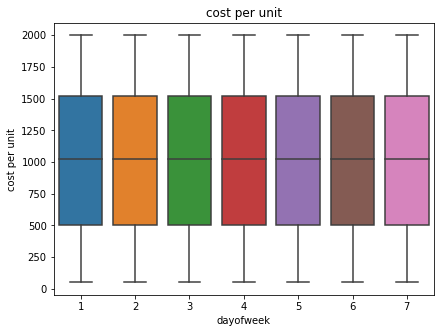

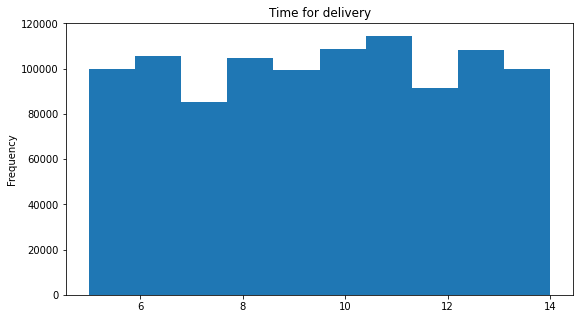

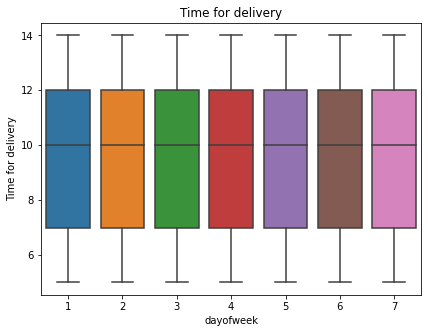

In [ ]:
try:
  obj1 =Complete_eda(data_all,"dayofweek")
  obj1.analyze()
except  NameError:
    print("Please load proper dataset in pandas dataframe or check dataset name")
except KeyError:
     print("Please type correct target variable") 

In [81]:
df=data_all.groupby("product type").mean()

In [82]:
df.revenue.max()

20718.51592356688

In [79]:
df.agg(['sum', 'min',"max"])

,revenue,no of purchases,promotion applied,generic holiday,education holiday,dayofweek,cost per unit,Time for delivery
sum,6.426115e+06,701889.125393,425.240814,34.306952,198.661587,4458.254452,1129200.0,10640.0
min,2.244503e+03,199.132696,0.377309,0.024442,0.159236,3.997877,50.0,5.0
max,2.071852e+04,3403.458599,0.382572,0.038259,0.221868,4.001319,1999.0,14.0


In [101]:
df.agg({'revenue' : ['sum','min', 'max']})

,revenue
sum,6.426115e+06
min,2.244503e+03
max,2.071852e+04


<IPython.core.display.Javascript object>

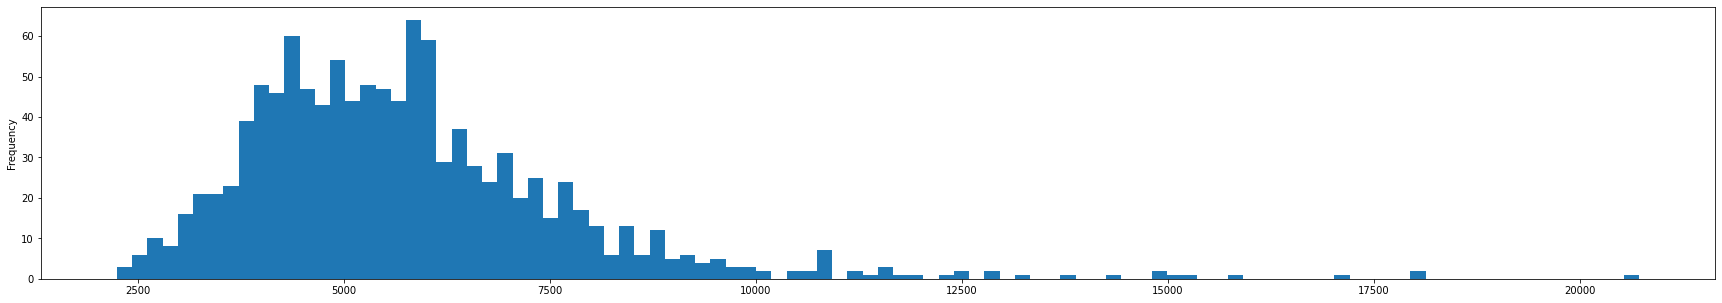

In [87]:
plt.figure(figsize=(30,5))
df["revenue"].plot.hist(bins=100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<BarContainer object of 1115 artists>

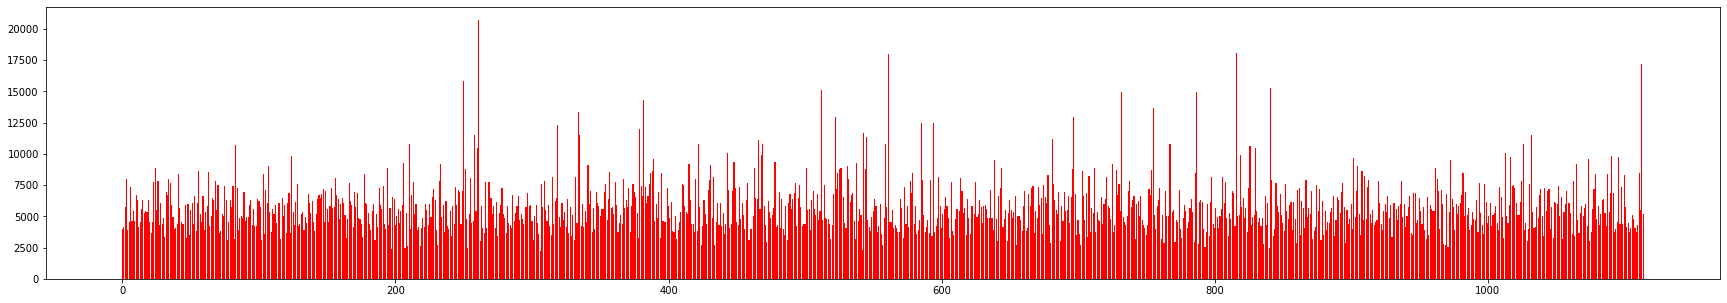

In [92]:
plt.figure(figsize=(30,5))
plt.bar(range(len(df)), df["revenue"], color='red')

In [95]:
#to save new data in csv file 
df.to_csv(r"/content/drive/MyDrive/Inventory_P47/prorevenueagg_all.csv",index=True)

In [97]:
df_sortedbyrevenue=df.sort_values("revenue", ascending=False)

In [98]:
df_sortedbyrevenue.head(10)

,revenue,no of purchases,promotion applied,generic holiday,education holiday,dayofweek,cost per unit,Time for delivery
product type,,,,,,,,
262,20718.515924,3402.010616,0.382166,0.025478,0.179406,3.997877,827.0,6.0
817,18108.139066,2605.488323,0.382166,0.025478,0.183652,3.997877,1385.0,12.0
562,17969.556263,3105.053079,0.382166,0.025478,0.221868,3.997877,112.0,8.0
1114,17200.196391,2664.057325,0.382166,0.025478,0.179406,3.997877,1232.0,13.0
251,15814.087049,2026.469214,0.382166,0.030786,0.180467,3.997877,1627.0,9.0
842,15242.114776,943.046174,0.377309,0.038259,0.163588,4.001319,326.0,9.0
513,15129.942675,1744.720807,0.382166,0.025478,0.183652,3.997877,1781.0,13.0
788,14949.194268,1429.761146,0.382166,0.025478,0.183652,3.997877,1578.0,11.0
733,14933.288747,3403.458599,0.382166,0.030786,0.180467,3.997877,1034.0,10.0


#INFERENCES:


*   PRODUCT TYPE ARE DIVIDED INTO 2 CATEGORIES BASED ON COUNTS 1: 942 2:758
*   REVENUE AND PURCHASES ARE HIGHLY CORRELATED AROUND 0.89
*   ADDING PROMOTIONS INCREASES PURCHASES

*  MERGING PROREVENUE AND PRODUCTDETAILS DATASET BY PRODUCTTYPE 
*  HIGH CORRELATION BETWEEN REVENUE AND NO OF PURCHASES
*  OUTLIERS NEED TO BE HANDLED
* POSITIVE SKEWNESS SEEN IN NO OF PURCHASES AND REVENUE COLUMN OF PROREVENUE DATASET






